In this project, 2 models for linear classification were implemented: a Gaussian Generative Model in addition to a Logistic Regression model (Equations listed). For each model, the percent accuracy was provided in addition to a plot displaying the dataset and a decision boundary, and a plot showing the ROC curve. Each model was tested using synthetic data (produced from sampling multivariate gaussian at specified means and covariances). In addition, both models were tested on a dataset obtained from Kaggle detailing features related to predicting patients with diabetes. The features chosen were Glucose Concentration and Diabetes Pedigree Function. The plots and accuracies were displayed for the second dataset as well. For the Kaggle dataset, a file labelled 'data.txt' was submitted, just click the three bars on the lefthand side of your screen, click the file icon, and drag the file into the directory.

####         Synthetic Data Classification...          ####

Percent Accuracy of Gaussian Generative Model: 93.2
Logistic Regression Classifier Ratio: 93.30000000000001

####         Testing on Diabetes Prediction data set...          ####

Percent Accuracy of Gaussian Generative Model: 73.828125
Logistic Regression Classifier Ratio: 74.21875


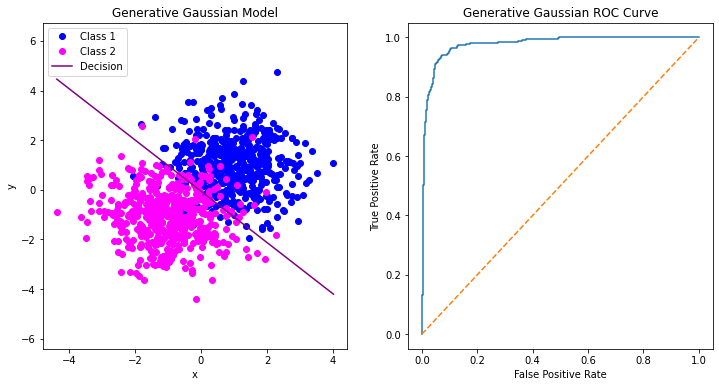

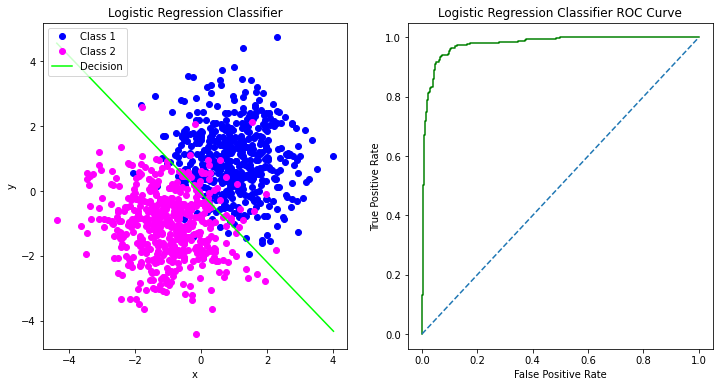

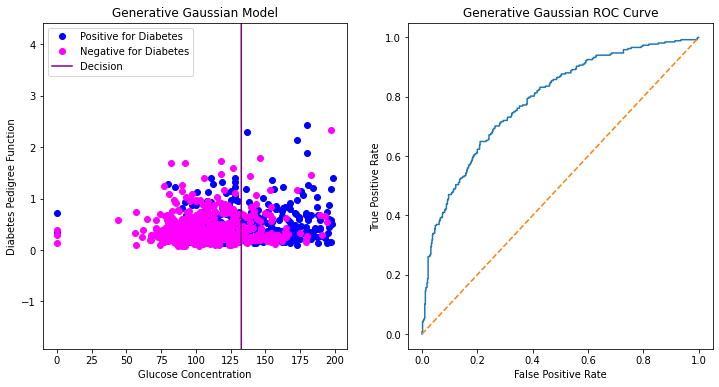

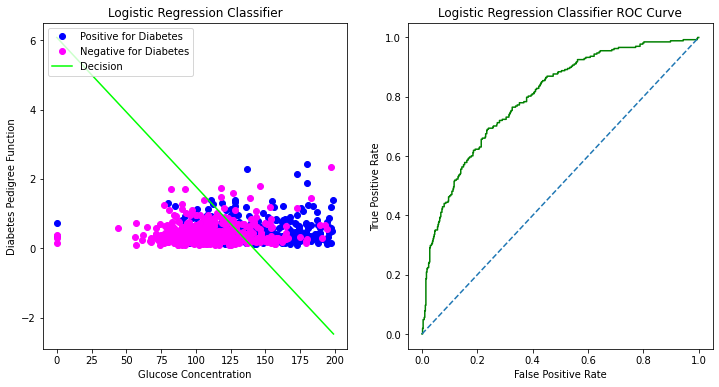

In [ ]:
#Project 3 | Linear Classification
#Layth Yassin and Husam Almanakly

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import roc_curve
#mpl.use('TkAgg')


print('####         Synthetic Data Classification...          ####')
print()


#Set up subplot figure 
figure, axarr = plt.subplots(nrows=1, ncols=2)
figure.set_figheight(6)
figure.set_figwidth(12)

figure2, axarr2 = plt.subplots(nrows=1, ncols=2)
figure2.set_figheight(6)
figure2.set_figwidth(12)

figure3, axarr3 = plt.subplots(nrows=1, ncols=2)
figure3.set_figheight(6)
figure3.set_figwidth(12)

figure4, axarr4 = plt.subplots(nrows=1, ncols=2)
figure4.set_figheight(6)
figure4.set_figwidth(12)


#Generate synthetic data
mu1_0 = np.array([1, 1])
mu2_0 = np.array([-1,-1])
sigma = np.eye(2)

N1 = 500
N2 = 500
N = N1 + N2

data1 = np.random.multivariate_normal(mu1_0, sigma, N1)
data2 = np.random.multivariate_normal(mu2_0, sigma, N2)
x = np.concatenate((data1, data2))

t1 = np.ones(len(data1))
t2 = np.zeros(len(data2))
t = np.concatenate((t1, t2))

#Function to calculate the percent accuracy
def ratio(data, thresh):
        count = 0
        for i in range(0,N):
            if(data[i] > thresh and t[i] == 1):
                count+=1
            elif(data[i] < thresh and t[i] == 0):
                count+=1

        ratio = count/N * 100
        return ratio

#Function for the Gaussian Generative Model 
def Generative(x, data1, data2, t, axarr):
    N1 = len(data1)
    N2 = len(data2)

    for i in range(0,N1):
        if(len(data1) == 268):
            item1, = axarr[0].plot(data1[i,0], data1[i,1], 'o', color = 'blue', label='Positive for Diabetes')
        else:
            item1, = axarr[0].plot(data1[i,0], data1[i,1], 'o', color = 'blue', label='Class 1')
    for i in range(0,N2):
        if(len(data1) == 268 ):
            item2, = axarr[0].plot(data2[i,0], data2[i,1], 'o', color = 'magenta', label='Negative for Diabetes')
        else:
            item2, = axarr[0].plot(data2[i,0], data2[i,1], 'o', color = 'magenta', label='Class 2')

    #Equation 4.73 - pi
    pii = N1/(N1+N2)

    total = 0
    total1 = 0
    for i in range(N):
        total += t[i] * x[i]
        total1 += (1 - t[i]) * x[i]

    #Equation 4.75 - µ1
    mu1 = (1/N1) * total

    #Equation 4.76 - µ2
    mu2 = (1/N2) * total1

    #Equation 4.79 - S1
    total = 0
    for i in range(N1):
        total += (data1[i] - mu1)@(data1[i] - mu1).T
    S1 = 1/N1*total

    #Equation 4.80 - S2
    total = 0
    for i in range(N2):
        total += (data2[i] - mu2)@(data2[i] - mu2).T
    S2 = 1/N2*total

    #Equation 4.78 - S
    S0 = N1/N * S1 + N2/N * S2
    S = np.zeros((2,2))
    S[0,0] = N1/N * S1
    S[1,1] = N2/N * S2

    #Equation 4.66, 4.67 - w and w0
    w = np.linalg.inv(S)@(mu1 - mu2)
    w0 = (-1/2)*mu1@np.linalg.inv(S)@mu1.T + 1/2*mu2@np.linalg.inv(S)@mu2.T + np.log(pii/(1 - pii))
    
    #Equation 4.65 - obtain the distribution by passing through a sigmoid
    a = w@x.T + w0
    output = 1/(1+np.exp(-a))
    thresh = 0.5

    accuracy = ratio(output,thresh)
    
    print(f'Percent Accuracy of Gaussian Generative Model: {accuracy}')

    xaxis = np.linspace(np.min(data2[:,0]), np.max(data1[:,0]),N)
    y = -w[0]/w[1]*xaxis - w0/w[1]
    #print(w[0]/w[1])
    #print(w0)
    bound, = axarr[0].plot(xaxis, y, color ='purple', label='Decision')
    axarr[0].set_title('Generative Gaussian Model')
    axarr[0].set_xlabel('x')
    axarr[0].set_ylabel('y')
    axarr[0].set_ylim([np.min(data2[:,1]) - 2, np.max(data1[:,1])+2])
    axarr[0].legend(handles=[item1, item2, bound], loc = 'upper left')

    fpr, tpr, threshold = roc_curve(t, output, pos_label=1)
    dot = np.linspace(0,1,1000)

    #print(fpr)
    axarr[1].plot(fpr,tpr)
    axarr[1].plot(dot,dot, '--')
    axarr[1].set_title('Generative Gaussian ROC Curve')
    axarr[1].set_xlabel('False Positive Rate')
    axarr[1].set_ylabel('True Positive Rate')

    return

Generative(x, data1, data2, t, axarr)

#Logistic Regression Model - IRLS Algorithm
def logistic(x, data1, data2, t, axarr2):
    N1 = len(data1)
    N2 = len(data2)

    for i in range(0,N1):
        if(len(data1) == 268):
            item3, = axarr2[0].plot(data1[i,0], data1[i,1], 'o', color = 'blue', label='Positive for Diabetes')    
        else:
            item3, = axarr2[0].plot(data1[i,0], data1[i,1], 'o', color = 'blue', label='Class 1')
    for i in range(0,N2):
        if(len(data1) == 268):
            item4, = axarr2[0].plot(data2[i,0], data2[i,1], 'o', color = 'magenta', label='Negative for Diabetes')    
        else:
            item4, = axarr2[0].plot(data2[i,0], data2[i,1], 'o', color = 'magenta', label='Class 2')

    #Initial guess of weights, initialize just to 1 for simplicity
    w_old = np.array([1, 1, 1])

    iota = np.zeros((N,3))
    for i in range(N):
        iota[i,0] = 1
        iota[i,1] = x[i,0]
        iota[i,2] = x[i,1]

    #Iterate process 150 times
    for j in range(150): 
        a = w_old@iota.T
        a = a/100
        #print(a)
        y = 1/(1+np.exp(-a)) 
        #print(y)

        #Equation 4.98
        R=np.zeros((N,N))
        for i in range(N):
            R[i,i] = y[i]*(1-y[i])

        #Equation 4.100
        z = iota@w_old - np.linalg.inv(R)@(y - t)

        #Equation 4.99
        w_old = np.linalg.inv(iota.T@R@iota)@iota.T@R@z

    #Final calculation of outputs 
    a = w_old@iota.T
    a = a/100
    prob = 1/(1+np.exp(-a))
    log_accuracy = ratio(prob, 0.5)
    print(f'Logistic Regression Classifier Ratio: {log_accuracy}')

    #find best decision boundary line
    xaxis = np.linspace(np.min(data2[:,0]), np.max(data1[:,0]),N)
    #print(w_old)
    y = -w_old[1]/w_old[2]*xaxis - w_old[0]/w_old[2]
    #print(w_old[0]/w_old[2])
    decision, = axarr2[0].plot(xaxis, y, color ='lime', label='Decision')
    axarr2[0].set_title('Logistic Regression Classifier')
    axarr2[0].set_xlabel('x')
    axarr2[0].set_ylabel('y')
    axarr2[0].legend(handles=[item3, item4, decision], loc = 'upper left')

    #Find and plot ROC curve
    fpr2, tpr2, threshold = roc_curve(t, prob, pos_label=1)
    dot = np.linspace(0,1,1000)

    #print(fpr2)
    axarr2[1].plot(fpr2,tpr2, color = 'green')
    axarr2[1].plot(dot,dot, '--')
    axarr2[1].set_title('Logistic Regression Classifier ROC Curve')
    axarr2[1].set_xlabel('False Positive Rate')
    axarr2[1].set_ylabel('True Positive Rate')

    return 

logistic(x, data1, data2, t, axarr2)


###         Testing on a new Data set       ###
#Import new data from text file

fin = open('data.txt')
tmp = fin.readlines()
N = 768
data1 = np.zeros((268,2))
data2 = np.zeros((500, 2))
t = np.zeros(N)
count1 = count2 = 0
for i in range(len(tmp)):
    x = tmp[i].split()
    if(float(x[2]) == 1):
        t[i] = float(x[2])
        data1[i,0] = float(x[0])
        data1[i,1] = float(x[1])
        #axarr3[0].plot(data1[i,0], data1[i,1], 'o', color = 'blue')
        count1+=1
for j in range(count1,len(tmp)):
    x = tmp[j].split()
    if(float(x[2]) == 0):
        t[j] = float(x[2])
        data2[j-count1,0] = float(x[0])
        data2[j-count1,1] = float(x[1])
        #axarr3[0].plot(data2[j-count1,0], data2[j-count1,1], 'o', color = 'red')
        count2+=1

x = np.concatenate((data1, data2))

print()
print('####         Testing on Diabetes Prediction data set...          ####')
print()
Generative(x, data1, data2, t, axarr3)
logistic(x, data1, data2, t, axarr4)

axarr3[0].set_xlabel('Glucose Concentration')
axarr3[0].set_ylabel('Diabetes Pedigree Function')
axarr4[0].set_xlabel('Glucose Concentration')
axarr4[0].set_ylabel('Diabetes Pedigree Function')

plt.show()